In [1]:
import os
import json

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import utils.globals as globals

c:\Users\Willi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
# Get a list of overall syneval accuracy
def get_syneval_total_acc(path):
    with open(path, 'r') as f:
        data = json.load(f)
    
    checkpoint_iters = sorted([int(key.split('-')[-1]) for key in data.keys()])
    checkpoint_head = '-'.join([key.split('-')[:-1] for key in data.keys()][0])
    
    accs = []
    for iter in checkpoint_iters:
        if iter == 130000:
            break
        k = f'{checkpoint_head}-{iter}'
        acc = aggregate_acc(data[k])
        accs.append(acc)

    return checkpoint_iters, accs

def aggregate_acc(data):
    total_n_test = 0
    for val in data.values():
        for v in val.values():
            # total_n_test += v[1]
            total_n_test += 1

    out = 0
    for val in data.values():
        for v in val.values():
            # out += v[0] * v[1] / total_n_test
            out += v[0] / total_n_test
    return out

# get_syneval_total_acc(f'{globals.OUT_DIR}/openwebtext-poc_syneval.json')
    

In [57]:
def get_aggregated(paths):
    ys = []
    for path in paths:
        x, y = get_syneval_total_acc(f'{globals.OUT_DIR}/{path}_syneval.json')
        ys.append(y)
    x = np.array(x)
    ys = np.array(ys)

    std = np.std(ys, axis=0)
    mean = np.mean(ys, axis=0)

    lower_bound = mean - std
    upper_bound = mean + std
    return x, mean, lower_bound, upper_bound
    
    
paths_babylm = ['babylm_100M-poc', 'babylm_100M-poc1', 'babylm_100M-poc2']
paths_openwebtext = ['openwebtext-poc', 'openwebtext-poc1', 'openwebtext-poc2']

x, m1, l1, u1 = get_aggregated(paths_babylm)
x, m2, l2, u2 = get_aggregated(paths_openwebtext)
x, m3, l1, u1 = get_aggregated(['subsample_vocab-poc2'])

x = np.array([x, x, x]).reshape(-1)
m = np.array([m1, m2, m3]).reshape(-1)
print(x.shape)
print(m.shape)

df = pd.DataFrame({
    '# Iteration': x,
    'Accurcay': m,
    'dataset': ['babyLM' for _ in range(len(x)//3)] + ['OpenWebText' for _ in range(len(x)//3)] + ['OpenWebText w/ subsampling by vocab' for _ in range(len(x)//3)]
})

ax = sns.lineplot(data = df, x = '# Iteration', y = 'Accurcay', hue = 'dataset')
plt.title('Performance on (Marvin and Linzen, 2018) \n (macro averaged across sub-categories)')
plt.savefig('./figs/syneval overall.png', dpi=200)
# ax.add_collection(plt.fill_between(x, l1, u1, alpha=.3))

(24,)
(3,)


<ipython-input-57-e8028b65931c>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  m = np.array([m1, m2, m3]).reshape(-1)


ValueError: All arrays must be of the same length

In [61]:
def aggregate_sub_cat(data):
    out = {}
    for d, subs in data.items():
        accs = []
        for val in subs.values():
            accs.append(val[0])
        out[d] = sum(accs) / len(accs)
    return out
path = f'{globals.OUT_DIR}/openwebtext-poc2_syneval.json'

with open(path, 'r') as f:
    data = json.load(f)['../results/model_checkpoints/openwebtext-poc2/checkpoint-40000']

out = aggregate_sub_cat(data)
for k, v in out.items():
    print(k)
    print(v)


prep_anim
0.6845833333333333
vp_coord
0.8690476190476191
simple_agrmt
0.9214285714285715
obj_rel_within_inanim
0.8202380952380953
prep_inanim
0.8337301587301587
reflexives_across
0.6604910714285714
simple_npi_anim
0.4666666666666667
obj_rel_no_comp_across_inanim
0.808829365079365
subj_rel
0.6533035714285714
obj_rel_across_anim
0.7729464285714285
reflexive_sent_comp
0.8428571428571429
obj_rel_no_comp_across_anim
0.65125
obj_rel_no_comp_within_inanim
0.8211309523809524
obj_rel_within_anim
0.7908928571428572
npi_across_anim
0.4508333333333333
simple_reflexives
0.9321428571428572
simple_npi_inanim
0.32638888888888884
obj_rel_no_comp_within_anim
0.7822321428571428
sent_comp
0.881547619047619
npi_across_inanim
0.4628472222222222
obj_rel_across_inanim
0.8844246031746033
long_vp_coord
0.8725


In [59]:
lis = [0.90,
0.79,
0.67,
0.63,
0.70,
0.79,
0.68,
0.62,
0.80,
0.75,
0.56,
0.53,
0.53,
0.00,
0.02]
print(np.average(np.array(lis)))

0.598


<ipython-input-53-ad1e433006d9>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  original = df.loc[df['type'] == 'original'][df['class'] == 'correct']
<ipython-input-53-ad1e433006d9>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  original_hit = df.loc[df['type'] == 'original'][df['class'] == 'correct'][df['preds'] == 1]
<ipython-input-53-ad1e433006d9>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gen = df.loc[df['type'] == 'generated'][df['class'] == 'correct']
<ipython-input-53-ad1e433006d9>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gen_hit = df.loc[df['type'] == 'generated'][df['class'] == 'correct'][df['preds'] == 1]
<ipython-input-53-ad1e433006d9>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  original = df.loc[df['type'] == 'original'][df['class'] == 'correct']
<ipython-input-53-ad1e433006d9>:11: UserWarn

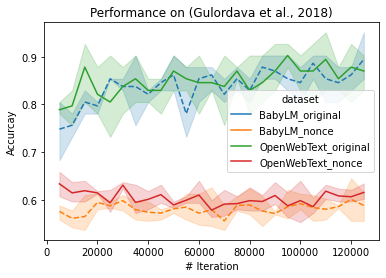

In [53]:

iters, acc, ds = [], [], []
dirs = ['../results/outputs/babylm_100M-poc/sva',
        '../results/outputs/babylm_100M-poc1/sva',
        '../results/outputs/babylm_100M-poc2/sva']
for dir in dirs:
    for iter in range(5000, 130000, 5000):
        path = f'{dir}/checkpoint-{iter}.csv'
        df = pd.read_csv(path)
        
        original = df.loc[df['type'] == 'original'][df['class'] == 'correct']
        original_hit = df.loc[df['type'] == 'original'][df['class'] == 'correct'][df['preds'] == 1]

        gen = df.loc[df['type'] == 'generated'][df['class'] == 'correct']
        gen_hit = df.loc[df['type'] == 'generated'][df['class'] == 'correct'][df['preds'] == 1]

        iters.append(iter)
        acc.append(len(original_hit)/len(original))
        ds.append('BabyLM_original')

        iters.append(iter)
        acc.append(len(gen_hit)/len(gen))
        ds.append('BabyLM_nonce')

dirs = ['../results/outputs/openwebtext-poc/sva',
       '../results/outputs/openwebtext-poc1/sva',
       '../results/outputs/openwebtext-poc2/sva']

for dir in dirs:
    for iter in range(5000, 130000, 5000):
        path = f'{dir}/checkpoint-{iter}.csv'
        df = pd.read_csv(path)
        
        original = df.loc[df['type'] == 'original'][df['class'] == 'correct']
        original_hit = df.loc[df['type'] == 'original'][df['class'] == 'correct'][df['preds'] == 1]

        gen = df.loc[df['type'] == 'generated'][df['class'] == 'correct']
        gen_hit = df.loc[df['type'] == 'generated'][df['class'] == 'correct'][df['preds'] == 1]

        iters.append(iter)
        acc.append(len(original_hit)/len(original))
        ds.append('OpenWebText_original')

        iters.append(iter)
        acc.append(len(gen_hit)/len(gen))
        ds.append('OpenWebText_nonce')

df = pd.DataFrame({
    '# Iteration': iters,
    'Accurcay': acc,
    'dataset': ds
})

ax = sns.lineplot(data = df, x = '# Iteration', y = 'Accurcay', hue = 'dataset')
ax.lines[0].set_linestyle("--")
ax.lines[1].set_linestyle("--")
plt.title('Performance on (Gulordava et al., 2018)')
plt.savefig('./figs/colorless green.png', dpi=200)